In [36]:
# Import libraries
import random
import numpy as np
import scipy.fftpack as scipypack
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.io.wavfile

In [6]:
# Helper function to generating a Waveforms
def genTriangleWave(amp = 1,freq = 1,off = 0,dur = 1,frate = 10000):
    if off < 0:
        print("ERROR: Offset must be greater than 0")
        return
    # Generate Triangle waveform
    nframes   = int((frate/(2*freq))+1)
    tempwav1  = np.linspace(-amp,amp,nframes)
    tempwav2  = np.linspace(amp,-amp,nframes)
    tempwav   = np.append(tempwav1[:nframes-1],tempwav2[:nframes-1])
    # Shift to offset
    startidx = np.argmax(tempwav >= 0)  
    startidx += int(len(tempwav)*off)
    wavend   = tempwav[:startidx]
    wavstart = tempwav[startidx:]
    wavcycle = np.append(wavstart,wavend)
    # Extend by duration and eliminate consecutive dups
    nwavs,wavfrac = divmod(dur,1/freq)
    wavextended1  = np.tile(wavcycle,int(nwavs))
    wavextended2  = wavcycle[:int(wavfrac*len(wavcycle))]
    wavout = np.append(wavextended1,wavextended2)
    ts2 = np.arange(0,dur,1/frate)
    # Generate Timestamps
    ts         = np.linspace(0,dur,len(wavout))
    return ts,wavout

def genSquareWave(amp = 1,freq = 1,off = 0,dur = 1,frate = 10000):
    if off < 0:
        print("ERROR: Offset must be greater than 0")
        return
    # Generate Square waveform
    nframes   = int((frate/(2*freq))+1)
    tempwav1  = np.full((1,nframes),-amp)
    tempwav2  = np.full((1,nframes),amp)
    tempwav   = np.append(tempwav1[:nframes-1],tempwav2[:nframes-1])
    # Shift to offset
    startidx = int(nframes/2)
    startidx += int(len(tempwav)*off)
    wavend   = tempwav[:startidx]
    wavstart = tempwav[startidx:]
    wavcycle = np.append(wavstart,wavend)
    # Extend by duration and eliminate consecutive dups
    nwavs,wavfrac = divmod(dur,1/freq)
    wavextended1  = np.tile(wavcycle,int(nwavs))
    wavextended2  = wavcycle[:int(wavfrac*len(wavcycle))]
    wavout = np.append(wavextended1,wavextended2)
    ts2 = np.arange(0,dur,1/frate)
    # Generate Timestamps
    ts         = np.linspace(0,dur,len(wavout))
    #print(2*nframes,len(ts),len(ts2))
    return ts,wavout

def genSawToothWave(amp = 1,freq = 1,off = 0,dur = 1,frate = 10000):
    if off < 0:
        print("ERROR: Offset must be greater than 0")
        return
    # Generate SawTooth waveform
    nframes   = int((frate/freq)+1)
    tempwav1  = np.linspace(-amp,amp,nframes)
    tempwav   = tempwav1[:nframes-1]
    # Shift to offset
    startidx = 0
    startidx += int(len(tempwav)*off)
    wavend   = tempwav[:startidx]
    wavstart = tempwav[startidx:]
    wavcycle = np.append(wavstart,wavend)
    # Extend by duration and eliminate consecutive dups
    nwavs,wavfrac = divmod(dur,1/freq)
    wavextended1  = np.tile(wavcycle,int(nwavs))
    wavextended2  = wavcycle[:int(wavfrac*len(wavcycle))]
    wavout = np.append(wavextended1,wavextended2)
    ts2 = np.arange(0,dur,1/frate)
    # Generate Timestamps
    ts         = np.linspace(0,dur,len(wavout))
    #print(2*nframes,len(ts),len(ts2))
    return ts,wavout

def genCosineWave(amp = 1,freq = 1,off = 0,dur = 1,frate = 10000):
    ts = np.arange(0,dur,1/frate)
    t  = np.arange(0,len(ts))
    return amp*np.cos((2*np.pi*freq*t/frate)+off),ts


In [33]:
# Helper Function for converting waves to fft power spectrums back and forth
def make_spectrum(datain, ratein):
    n = len(datain)
   # d = 1 ./ ratein  # timestep
    # power spectral density
    hsout = np.fft.rfft(datain)
    # frequency spectrum
    freq = np.fft.rfftfreq(n, d=1./ratein)
    return hsout, freq

def make_wave(hsin):
    wave = np.fft.irfft(hsin)
    return wave

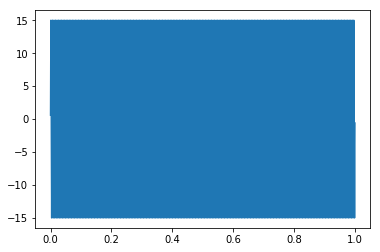

In [24]:
## HARMONIC STRUCTURE
# Signal specs
amp1  = 15  # Amplitude (V)
freq1 = 200   # frequency (hz)
off1  = 0   # offset (s)
dur1  = 1   # duration (s)
# Generate Triangle Wave
ts,wave = genTriangleWave(amp = amp1,freq = freq1,off = off1,dur = dur1)
plt.plot(ts,wave)
plt.show()

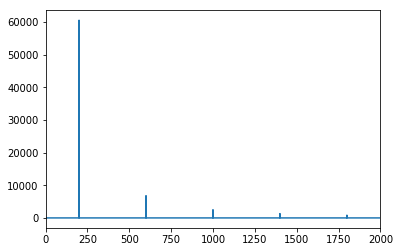

Frequency Ratio can be used to find frequency Amplitudes due to Harmonic Structure:
	TRIANGLE WAVES-->Amplitude Ratio = FreqRatio^2
Frequency Ratios:  (3.0, 1.6666666666666667)
Amplitude Ratios:  (8.9056251275151936, 2.7196446666160567)
Harmonic Structure:  (9.0, 2.777777777777778)


In [25]:
# Look at FFT power spectrum 
spec,fq = make_spectrum(np.copy(wave),10000)
absspec = np.abs(spec)
plt.plot(fq,absspec)
plt.xlim([0,2000])
plt.show()
# Find freqency & amplitude ratio to find harmonic Structure
harmonics  = (np.argmax(fq > 199),np.argmax(fq > 599),np.argmax(fq > 999))
amplitudes = (absspec[harmonics[0]],absspec[harmonics[1]],absspec[harmonics[2]])
freqRatios = (600/200,1000/600)
ampRatios  = amplitudes[0]/amplitudes[1],amplitudes[1]/amplitudes[2]
harmStruct = (freqRatios[0]*freqRatios[0],freqRatios[1]*freqRatios[1])
print("Frequency Ratio can be used to find frequency Amplitudes due to Harmonic Structure:")
print("\tTRIANGLE WAVES-->Amplitude Ratio = FreqRatio^2")
print("Frequency Ratios: " , freqRatios)
print("Amplitude Ratios: " , ampRatios)
print("Harmonic Structure: ", harmStruct)


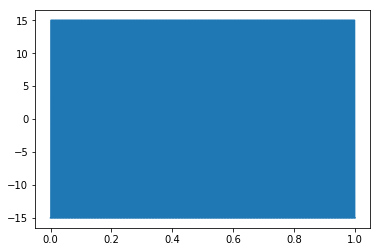

In [26]:
# Generate Square Wave
ts2,wave2 = genSquareWave(amp = amp1,freq = freq1,off = off1,dur = dur1)
plt.plot(ts2,wave2)
plt.show()

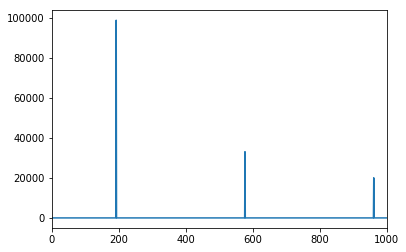

Frequency Ratio can be used to find frequency Amplitudes due to Harmonic Structure:
	SQUARE WAVES--> Amplitude Ratio = FreqRatio
Frequency Ratios:  (2.9999999999999996, 1.6666666666666667)
Amplitude Ratios:  (2.9854177481961148, 1.6504562505617313)
Harmonic Structure:  (2.9999999999999996, 1.6666666666666667)


In [27]:
# Look at FFT power spectrum 
spec2,fq2 = make_spectrum(np.copy(wave2),10000)
absspec2 = np.abs(spec2)
plt.plot(fq2,absspec2)
plt.xlim([0,1000])
plt.show()
# Find freqency & amplitude ratio to find harmonic Structure
lthresh    = absspec2 > 10000
harmonics  = fq2[lthresh]
amplitudes = absspec2[lthresh]
freqRatios = (harmonics[1]/harmonics[0],harmonics[2]/harmonics[1])
ampRatios  = amplitudes[0]/amplitudes[1],amplitudes[1]/amplitudes[2]
harmStruct = (freqRatios[0],freqRatios[1])
print("Frequency Ratio can be used to find frequency Amplitudes due to Harmonic Structure:")
print("\tSQUARE WAVES--> Amplitude Ratio = FreqRatio")
print("Frequency Ratios: " , freqRatios)
print("Amplitude Ratios: " , ampRatios)
print("Harmonic Structure: ", harmStruct)

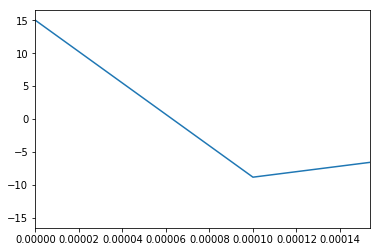

In [28]:
## ALIASING
# Signal specs
amp1  = 15     # Amplitude (V)
freq1 = 6500   # frequency (hz)
freq2 = 3500   # frequency (hz)
off1  = 0      # offset (s)
dur1  = 1      # duration (s)

wave,ts = genCosineWave(amp = amp1,dur = dur1,freq = freq1,frate=10000,off = off1)
wave2,ts2 = genCosineWave(amp = amp1,dur = dur1,freq = freq1,frate=10000,off = off1)

plt.plot(ts,wave)
plt.xlim([0,1/freq1])
plt.show()


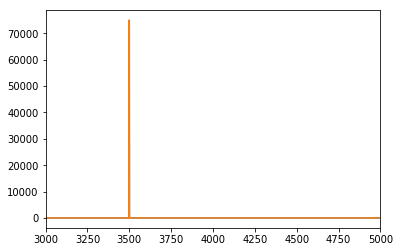

		NYQUIST Frequency = 2 x Sampling rate
Comparing freq power spectrum of two different waveforms
	freq1:  6500 		 freq2:  3500
	 [ 3500.] 		 [ 3500.]


In [29]:
# Look at FFT power spectrum 
spec,fq = make_spectrum(np.copy(wave),10000)
spec2,fq2 = make_spectrum(np.copy(wave2),10000)

absspec = np.abs(spec)
absspec2 = np.abs(spec2)

plt.plot(fq,absspec)
plt.plot(fq2,absspec2)

plt.xlim([3000,5000])
plt.show()
lthresh     = absspec > 500
lthresh2    = absspec2 > 500
harmonics   = fq[lthresh]
harmonics2  = fq2[lthresh2]
print("\t\tNYQUIST Frequency = 2 x Sampling rate")
print("Comparing freq power spectrum of two different waveforms")
print("\tfreq1: ",freq1,"\t\t freq2: ",freq2)
print("\t",harmonics,"\t\t",harmonics2)


42 9980 10000


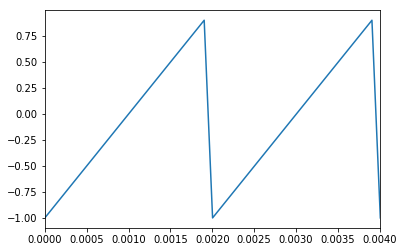

In [42]:
## Inspecting phases
# Signal specs
amp1  = 1     # Amplitude (V)
freq1 = 500   # frequency (hz)
off1  = 0      # offset (s)
dur1  = 1      # duration (s)

# Generate SawTooth Wave
ts,wave = genSawToothWave(amp = amp1,freq = freq1,off = off1,dur = dur1)
plt.plot(ts,wave)
plt.xlim([0,2/freq1])
plt.show()
sd.play(wave,10000)

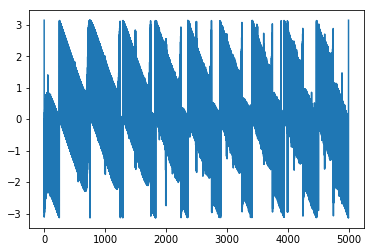

In [45]:
# Shuffled phases and place back into the spectrum. 
spec,fq = make_spectrum(np.copy(wave),10000)
magnitude = np.absolute(spec)
angle = np.angle(spec)
random.shuffle(angle)
# Each element in hs is a complex number with magitude AA and phase ϕϕ, we we compute Aeiϕ
i = complex(0, 1)
spec_reordered = magnitude * np.exp(i * angle)
wave_reordered = make_wave(spec_reordered) 
sd.play(wave_reordered,10000)